In [45]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import math

In [46]:
iris = pd.read_csv("./data/iris/IRIS.csv")

X = iris.drop('species', axis=1).values  # 输入特征
y = iris['species'].values  # 目标变量

# 将类别标签编码为整数
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

# 将整数编码转换为虚拟变量（one-hot 编码）
dummy_y = to_categorical(encoded_Y)

In [47]:
# Sturges' formula
bins = int(1 + math.log(len(iris)))

# 第三部分：K 折交叉验证和模型训练
kfold = KFold(n_splits=bins, shuffle=True, random_state=42)  
acc_scores = []  # 用于存储每折的准确率

for train, test in kfold.split(X, dummy_y):
    # 定义模型结构
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))

    # 编译模型
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # 训练模型
    model.fit(X[train], dummy_y[train], epochs=150, batch_size=10, verbose=0)

    # 评估模型
    scores = model.evaluate(X[test], dummy_y[test], verbose=0)
    acc_scores.append(scores[1] * 100)

# 输出每次迭代的准确率和平均准确率
print(f"准确率: {acc_scores}")
print(f"平均准确率: {np.mean(acc_scores)}%")

准确率: [87.99999952316284, 95.99999785423279, 95.99999785423279, 87.99999952316284, 95.99999785423279, 100.0]
平均准确率: 93.99999876817067%


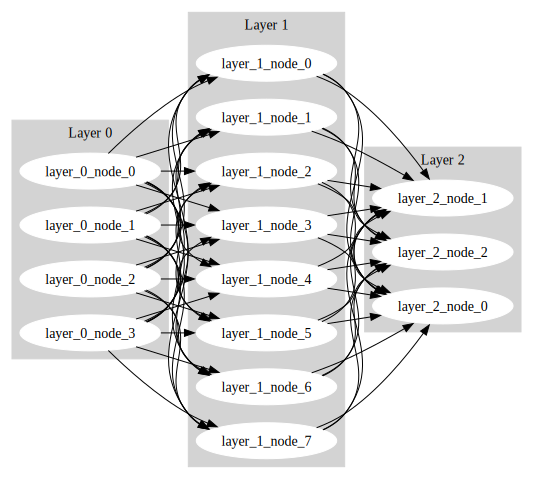

In [48]:
from graphviz import Digraph

def draw_neural_net(layer_sizes):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
    node_layers = []

    # 创建每层的节点
    for i, size in enumerate(layer_sizes):
        with dot.subgraph(name=f'cluster_{i}') as c:
            c.attr(style='filled', color='lightgrey')
            c.node_attr.update(style='filled', color='white')
            nodes = []
            for j in range(size):
                node_name = f'layer_{i}_node_{j}'
                c.node(node_name)
                nodes.append(node_name)
            node_layers.append(nodes)
            c.attr(label=f'Layer {i}')

    # 连接层与层之间的节点
    for i in range(len(node_layers) - 1):
        for src in node_layers[i]:
            for dst in node_layers[i + 1]:
                dot.edge(src, dst)

    return dot

# 输入层 4，隐藏层 8，输出层 3
layer_sizes = [4, 8, 3]
dot = draw_neural_net(layer_sizes)
dot

In [49]:
# 循环不同的隐层节点数和激活函数
hidden_layer_sizes = [4, 8, 16] # 不同的隐层节点数
activation_functions = ['relu', 'sigmoid', 'tanh'] # 不同的激活函数
experiment_results = ""

for activation in activation_functions:
    for size in hidden_layer_sizes:
        acc_scores = []
        for train, test in kfold.split(X, dummy_y):
            # 创建模型
            model = Sequential()
            model.add(Dense(size, input_dim=4, activation=activation))
            model.add(Dense(3, activation='softmax'))

            # 编译模型
            model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

            # 训练模型
            model.fit(X[train], dummy_y[train], epochs=150, batch_size=10, verbose=0)

            # 评估模型
            scores = model.evaluate(X[test], dummy_y[test], verbose=0)
            acc_scores.append(scores[1] * 100)

        # 输出并存储结果
        result = f"激活函数: {activation}, 隐层节点数: {size}, 准确率: {acc_scores}, 平均准确率: {np.mean(acc_scores)}%\n"
        print(result)
        experiment_results += result

激活函数: relu, 隐层节点数: 4, 准确率: [75.99999904632568, 100.0, 100.0, 87.99999952316284, 28.00000011920929, 51.99999809265137], 平均准确率: 73.9999994635582%

激活函数: relu, 隐层节点数: 8, 准确率: [95.99999785423279, 100.0, 100.0, 87.99999952316284, 100.0, 100.0], 平均准确率: 97.3333328962326%

激活函数: relu, 隐层节点数: 16, 准确率: [95.99999785423279, 95.99999785423279, 100.0, 92.00000166893005, 95.99999785423279, 100.0], 平均准确率: 96.66666587193806%

激活函数: sigmoid, 隐层节点数: 4, 准确率: [95.99999785423279, 100.0, 95.99999785423279, 87.99999952316284, 95.99999785423279, 87.99999952316284], 平均准确率: 93.99999876817067%

激活函数: sigmoid, 隐层节点数: 8, 准确率: [100.0, 95.99999785423279, 100.0, 92.00000166893005, 95.99999785423279, 100.0], 平均准确率: 97.3333328962326%

激活函数: sigmoid, 隐层节点数: 16, 准确率: [95.99999785423279, 95.99999785423279, 100.0, 87.99999952316284, 95.99999785423279, 100.0], 平均准确率: 95.99999884764354%

激活函数: tanh, 隐层节点数: 4, 准确率: [100.0, 100.0, 100.0, 92.00000166893005, 100.0, 100.0], 平均准确率: 98.66666694482167%

激活函数: tanh, 隐层节点数: 8, 准确率: [10

In [50]:
import re
# 调整正则表达式以匹配实验结果文本
pattern_adjusted = r"激活函数: (\w+), 隐层节点数: (\d+), .*?平均准确率: ([\d.]+)%"

# 使用调整后的正则表达式查找所有匹配项
matches_adjusted = re.findall(pattern_adjusted, experiment_results)

matches_adjusted

[('relu', '4', '73.9999994635582'),
 ('relu', '8', '97.3333328962326'),
 ('relu', '16', '96.66666587193806'),
 ('sigmoid', '4', '93.99999876817067'),
 ('sigmoid', '8', '97.3333328962326'),
 ('sigmoid', '16', '95.99999884764354'),
 ('tanh', '4', '98.66666694482167'),
 ('tanh', '8', '96.66666587193806'),
 ('tanh', '16', '97.99999992052715')]

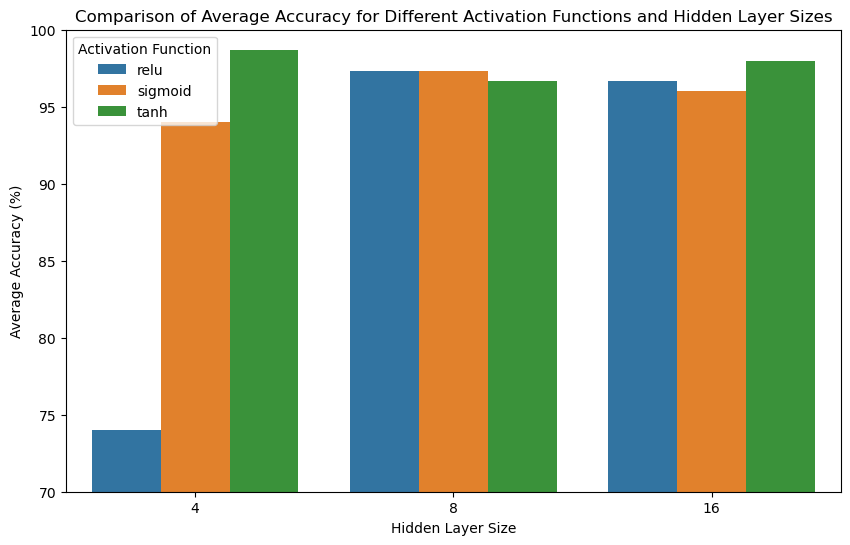

In [54]:
data = {
    'Activation Function': [match[0] for match in matches_adjusted],
    'Hidden Layer Size': [int(match[1]) for match in matches_adjusted],
    'Average Accuracy (%)': [float(match[2]) for match in matches_adjusted]
}

df = pd.DataFrame(data)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Hidden Layer Size', y='Average Accuracy (%)', hue='Activation Function', data=df)

plt.title('Comparison of Average Accuracy for Different Activation Functions and Hidden Layer Sizes')
plt.xlabel('Hidden Layer Size')
plt.ylabel('Average Accuracy (%)')
plt.ylim(70, 100)  # 设置 y 轴的范围从 70 开始
plt.legend(title='Activation Function')

plt.show()

In [61]:
# 循环不同的隐层数量和激活函数
hidden_layers = [1, 2, 3]  # 不同的隐层数量
activation_functions = ['relu', 'sigmoid', 'tanh']
experiment_results = ""

for activation in activation_functions:
    for num_layers in hidden_layers:
        acc_scores = []
        for train, test in kfold.split(X, dummy_y):
            # 创建模型
            model = Sequential()
            for _ in range(num_layers):
                model.add(Dense(8, input_dim=4, activation=activation))
            model.add(Dense(3, activation='softmax'))

            # 编译模型
            model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

            # 训练模型
            model.fit(X[train], dummy_y[train], epochs=150, batch_size=10, verbose=0)

            # 评估模型
            scores = model.evaluate(X[test], dummy_y[test], verbose=0)
            acc_scores.append(scores[1] * 100)

        # 输出并存储结果
        result = f"激活函数: {activation}, 隐层数量: {num_layers}, 平均准确率: {np.mean(acc_scores)}%"
        print(result)
        experiment_results += result

激活函数: relu, 隐层数量: 1, 平均准确率: 95.99999884764354%
激活函数: relu, 隐层数量: 2, 平均准确率: 96.66666587193806%
激活函数: relu, 隐层数量: 3, 平均准确率: 97.99999992052715%
激活函数: sigmoid, 隐层数量: 1, 平均准确率: 95.99999884764354%
激活函数: sigmoid, 隐层数量: 2, 平均准确率: 97.3333328962326%
激活函数: sigmoid, 隐层数量: 3, 平均准确率: 96.66666587193806%
激活函数: tanh, 隐层数量: 1, 平均准确率: 96.66666587193806%
激活函数: tanh, 隐层数量: 2, 平均准确率: 95.99999884764354%
激活函数: tanh, 隐层数量: 3, 平均准确率: 96.66666587193806%


In [62]:
pattern_adjusted = r"激活函数: (\w+), 隐层数量: (\d+), .*?平均准确率: ([\d.]+)%"

matches_adjusted = re.findall(pattern_adjusted, experiment_results)

matches_adjusted

[('relu', '1', '95.99999884764354'),
 ('relu', '2', '96.66666587193806'),
 ('relu', '3', '97.99999992052715'),
 ('sigmoid', '1', '95.99999884764354'),
 ('sigmoid', '2', '97.3333328962326'),
 ('sigmoid', '3', '96.66666587193806'),
 ('tanh', '1', '96.66666587193806'),
 ('tanh', '2', '95.99999884764354'),
 ('tanh', '3', '96.66666587193806')]

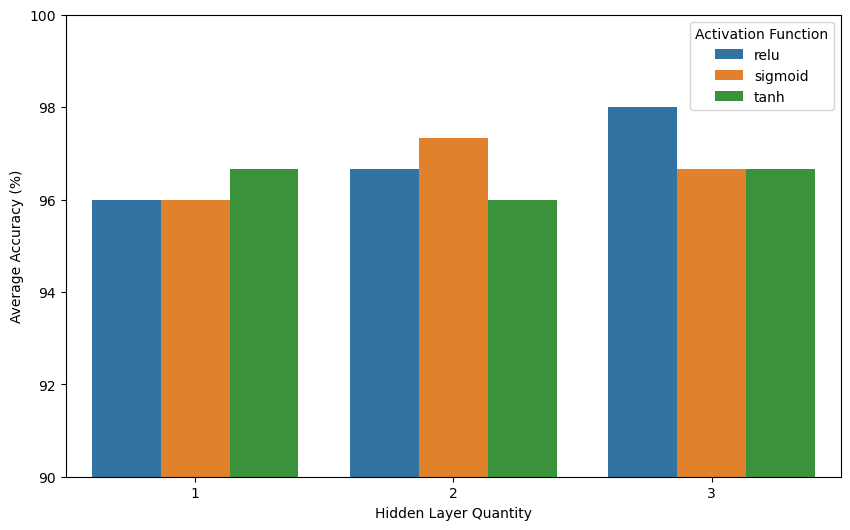

In [67]:
data = {
    'Activation Function': [match[0] for match in matches_adjusted],
    'Hidden Layer Quantity': [int(match[1]) for match in matches_adjusted],
    'Average Accuracy (%)': [float(match[2]) for match in matches_adjusted]
}

df = pd.DataFrame(data)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Hidden Layer Quantity', y='Average Accuracy (%)', hue='Activation Function', data=df)

plt.xlabel('Hidden Layer Quantity')
plt.ylabel('Average Accuracy (%)')
plt.ylim(90, 100)  # 设置 y 轴的范围从 70 开始
plt.legend(title='Activation Function')

plt.show()

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

# 加载数据集
train_data = pd.read_csv('./data/titanic/train.csv')
test_data = pd.read_csv('./data/titanic/test.csv')

# 预处理数据
# 选取特征：'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'
# 需要处理缺失值和类别数据
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
train_data['Embarked'].fillna('S', inplace=True)  # 最常见的类别
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# 选取特征和标签
features = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
labels = train_data['Survived']

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)

# 创建神经网络模型
model = Sequential()
model.add(Dense(64, input_shape=(7,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # 二分类问题

# 编译模型
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 训练模型
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# 评估模型
accuracy = model.evaluate(X_val, y_val, verbose=0)

accuracy

[0.41199004650115967, 0.8100558519363403]